In [ ]:
!pip install folium

Defaulting to user installation because normal site-packages is not writeable


<h2>BERCHES, CHARLES V.</h2>
<h2>BSIT-3A</h2>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
import warnings
warnings.filterwarnings('ignore')

In [3]:
accidents = pd.read_csv('uk_road_accident.csv')

In [4]:
accidents

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [5]:
accidents['Accident Date'] = accidents['Accident Date'].str.strip()

accidents['Accident Date'] = accidents['Accident Date'].astype('str')

accidents['Accident Date'] = accidents['Accident Date'].str.replace('/', '-')

accidents['Accident Date'] = pd.to_datetime(accidents['Accident Date'], dayfirst=True, errors='coerce')

In [6]:
accidents.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [7]:
accidents['Latitude'] = accidents['Latitude'].fillna(accidents['Latitude'].mode()[0])
accidents['Longitude'] = accidents['Longitude'].fillna(accidents['Longitude'].mode()[0])
accidents['Road_Surface_Conditions'] = accidents['Road_Surface_Conditions'].fillna('unaccounted')
accidents['Road_Type'] = accidents['Road_Type'].fillna('unaccounted')
accidents['Urban_or_Rural_Area'] = accidents['Urban_or_Rural_Area'].fillna('unaccounted')
accidents['Weather_Conditions'] = accidents['Weather_Conditions'].fillna(accidents['Weather_Conditions'].mode()[0])

In [8]:
accidents['Year'] = accidents['Accident Date'].dt.year
accidents['Month'] = accidents['Accident Date'].dt.month
accidents['Day'] = accidents['Accident Date'].dt.day
accidents['DayOfWeek'] = accidents['Accident Date'].dt.dayofweek
accidents.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Month                      0
Day                        0
DayOfWeek                  0
dtype: int64

<hr>
<h1>Using District Area to make a comparison to a general result</h1>

<h1>DISTRICT #1 - ASHFIELD</h1>

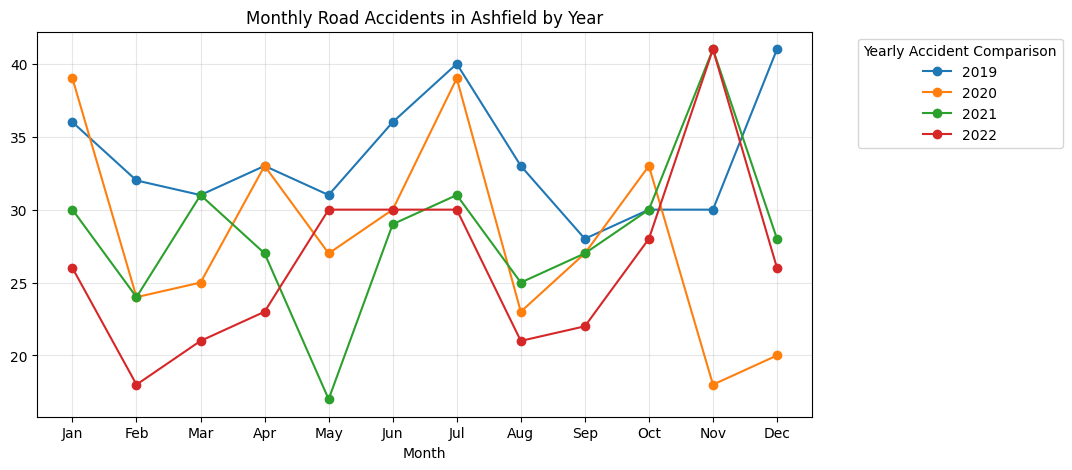

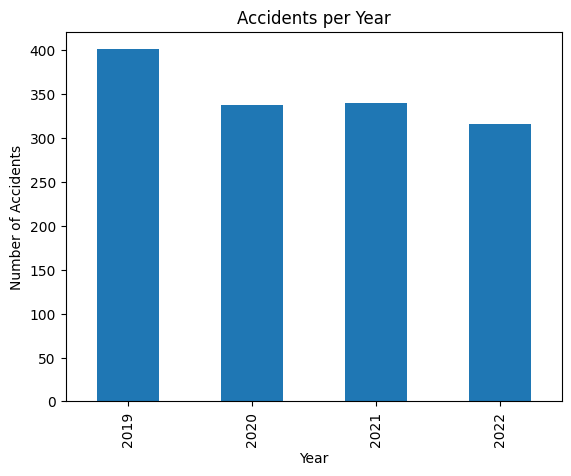

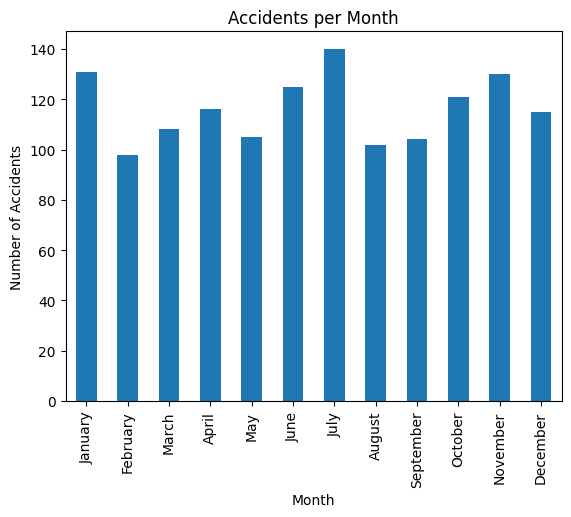

DayOfWeek
Monday       144
Tuesday      159
Wednesday    240
Thursday     242
Friday       194
Saturday     233
Sunday       183
Name: count, dtype: int64


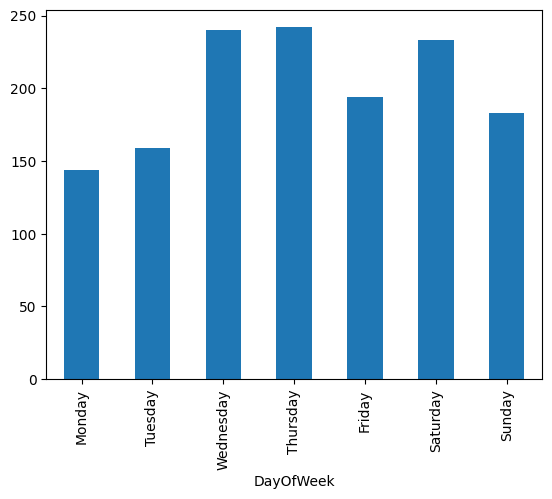

In [9]:
# District
da1 = accidents[accidents['District Area'] == 'Ashfield']

monthly = da1.groupby(['Year', 'Month']).size()

monthly = monthly.unstack(level=0)

monthly.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Ashfield by Year'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

# Per Year, Month, Day
accidents_per_year = da1['Year'].value_counts().sort_index()
accidents_per_month = da1['Month'].value_counts().sort_index()
accidents_per_day = da1['DayOfWeek'].value_counts().sort_index()

accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

accidents_per_month.index = accidents_per_month.index.map(month_names)

accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

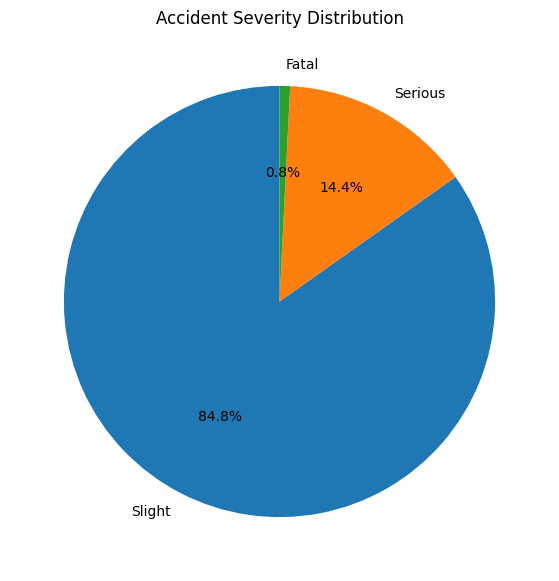

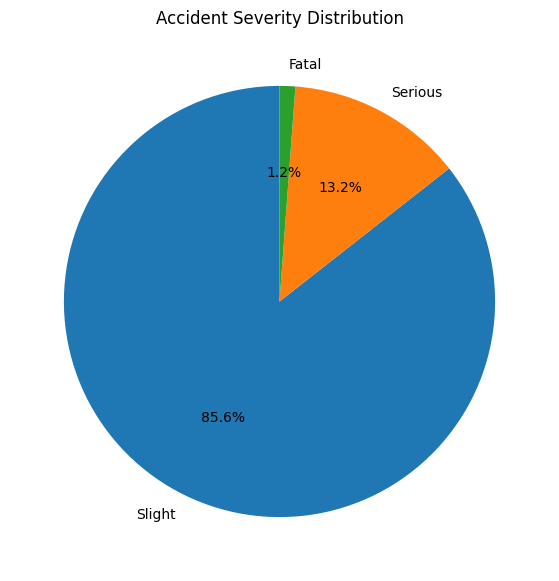

In [10]:
# Severity
severity  = da1['Accident_Severity'].value_counts()

plt.pie(severity,
        labels = severity.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2021_da1 = da1[da1['Year'] == 2021]

da1_2021 = severity_2021_da1['Accident_Severity'].value_counts()

plt.pie(da1_2021,
        labels = da1_2021.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

<h1>HEATMAP FOR ASHFIELD DISTRICT</h1>

In [11]:
aAccidents = accidents[accidents['District Area']== 'Ashfield']

aFatal = aAccidents[aAccidents['Accident_Severity'] == 'Fatal']

locations  = list(zip(aFatal['Latitude'],aFatal['Longitude']))

MAR = folium.Map(location=[aFatal['Latitude'].mean(), aFatal['Longitude'].mean()], zoom_start=10)

HeatMap(locations).add_to(MAR)
MAR.save('accident_heatmap.html')
MAR

<hr>
<h1>INSIGHT #1</h1>
<p>In Ashfield district, most accidents are classified as <b>slight</b>, while only a smaller portion are serious or fatal. Accidents are more common on <b>Thursdays and Saturdays</b> compared to other days of the week. The map also shows that many accidents happen around Mansfield and along the main roads nearby, making these areas clear hotspots.</p>

<hr>
<h1>DISTRICT #2 - NORTHAMPTON</h1>

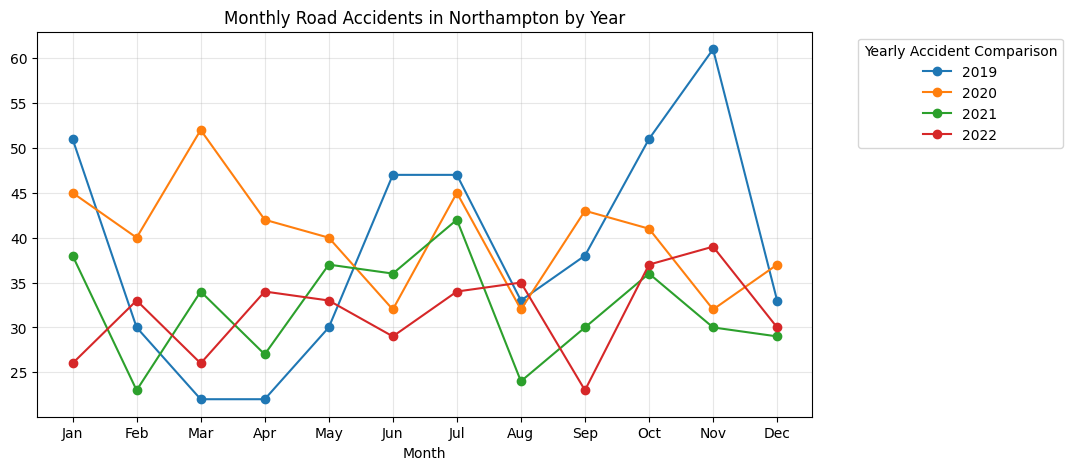

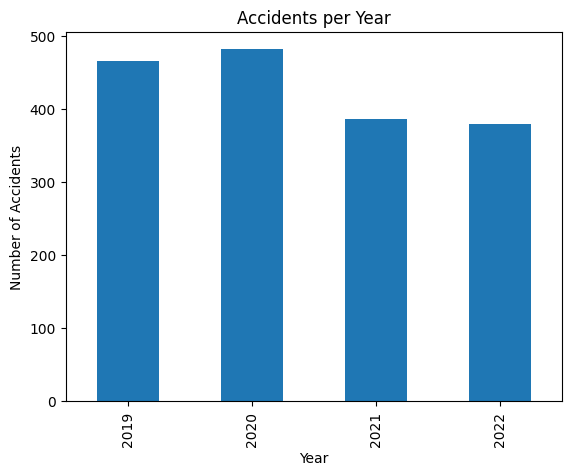

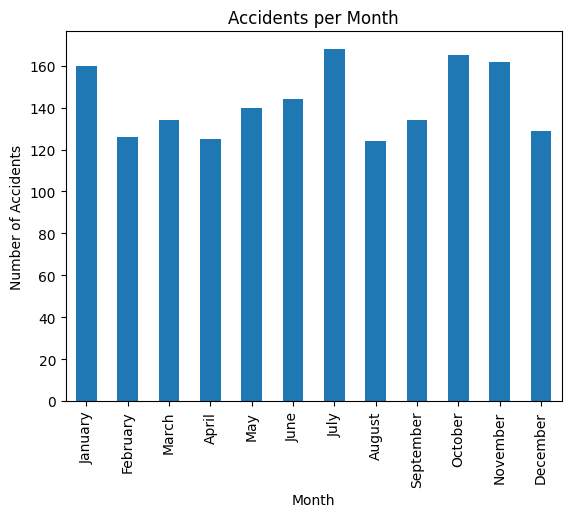

DayOfWeek
Monday       180
Tuesday      227
Wednesday    266
Thursday     253
Friday       270
Saturday     269
Sunday       246
Name: count, dtype: int64


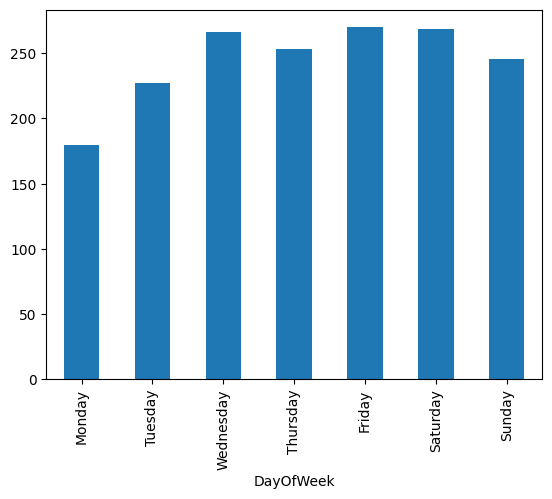

In [12]:
# District
da2 = accidents[accidents['District Area'] == 'Northampton']

monthly = da2.groupby(['Year', 'Month']).size()

monthly = monthly.unstack(level=0)

monthly.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Northampton by Year'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

# Per Year, Month, Day
accidents_per_year = da2['Year'].value_counts().sort_index()
accidents_per_month = da2['Month'].value_counts().sort_index()
accidents_per_day = da2['DayOfWeek'].value_counts().sort_index()

accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

accidents_per_month.index = accidents_per_month.index.map(month_names)

accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

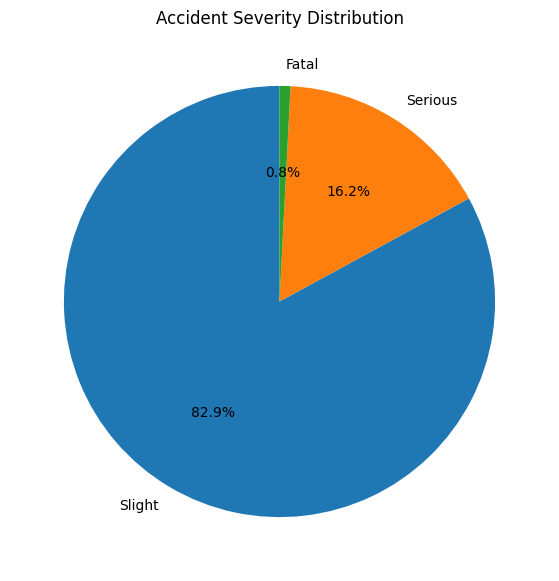

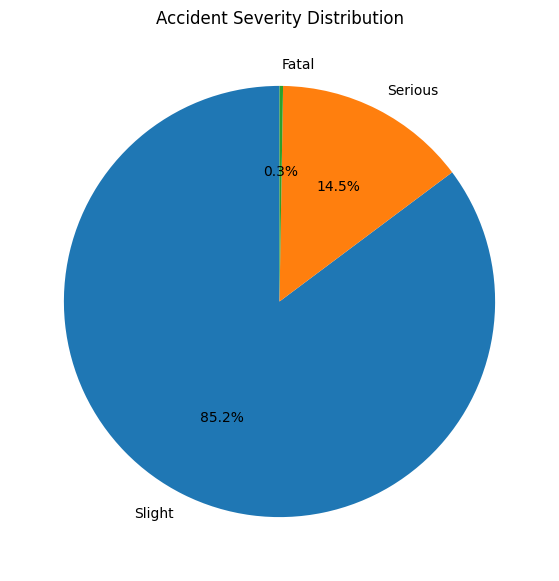

In [13]:
# Severity
severity  = da2['Accident_Severity'].value_counts()

plt.pie(severity,
        labels = severity.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2022_da2 = da2[da2['Year'] == 2022]

da2_2022 = severity_2022_da2['Accident_Severity'].value_counts()

plt.pie(da2_2022,
        labels = da2_2022.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

<h1>HEATMAP FOR NORTHAMPTON DISTRICT</h1>

In [14]:
nAccidents = accidents[accidents['District Area']== 'Northampton']

nFatal = nAccidents[nAccidents['Accident_Severity'] == 'Fatal']

locations  = list(zip(nFatal['Latitude'],nFatal['Longitude']))

MAR = folium.Map(location=[nFatal['Latitude'].mean(), nFatal['Longitude'].mean()], zoom_start=10)

HeatMap(locations).add_to(MAR)
MAR.save('accident_heatmap.html')
MAR

<hr>
<h1>INSIGHT #2</h1>
<p>In Northampton district, most road accidents are <b>slight</b>, while serious and fatal accidents make up a smaller share. The number of accidents was higher in 2019 and 2020 compared to 2021 and 2022. Accidents happen more often on <b>Fridays and Saturdays.</b></p>

<h1>INSIGHT #3</h1>
<p>The map shows that hotspots are concentrated in the central part of Northampton and along major roads leading in and out of the town.</p>

<hr>
<h1>DISTRICT #3 - GLOUCESTER</h1>

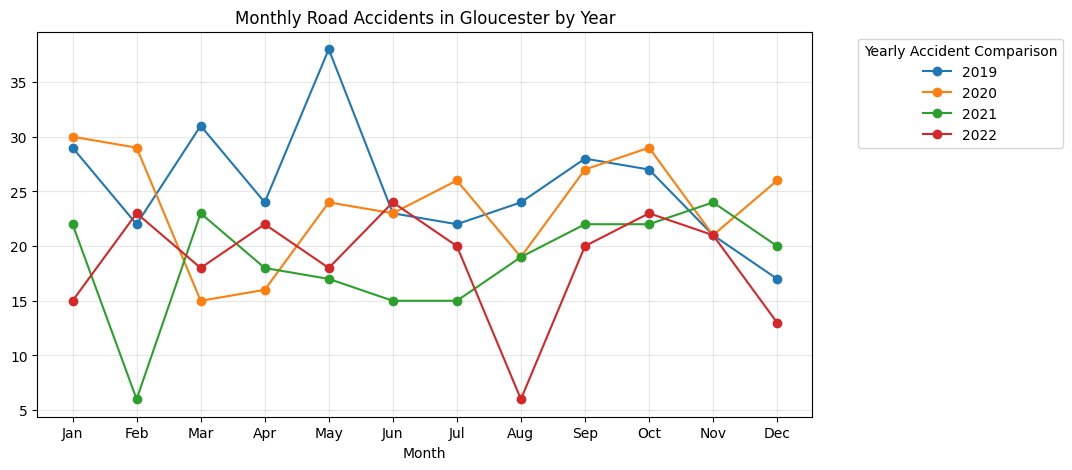

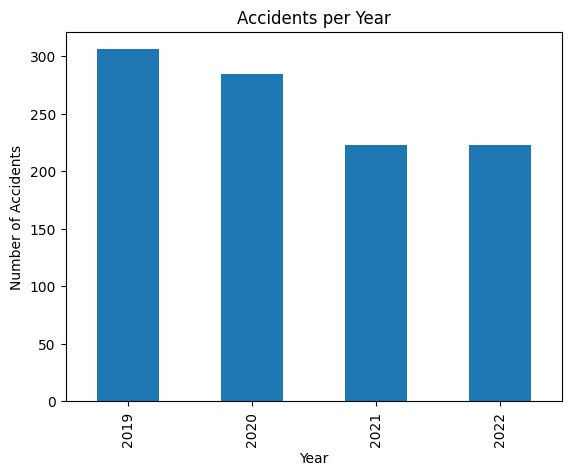

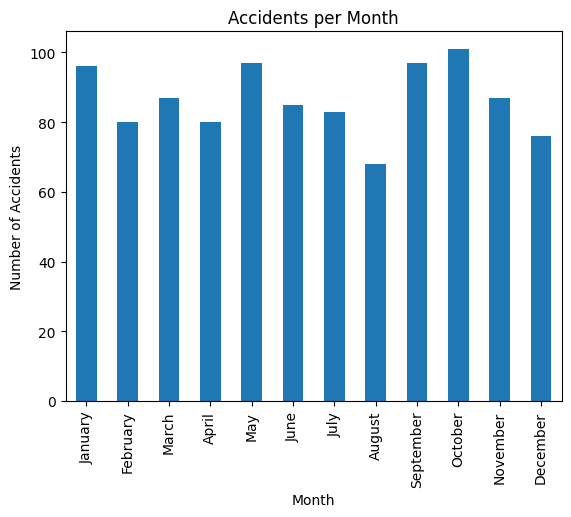

DayOfWeek
Monday        97
Tuesday      139
Wednesday    164
Thursday     149
Friday       159
Saturday     194
Sunday       135
Name: count, dtype: int64


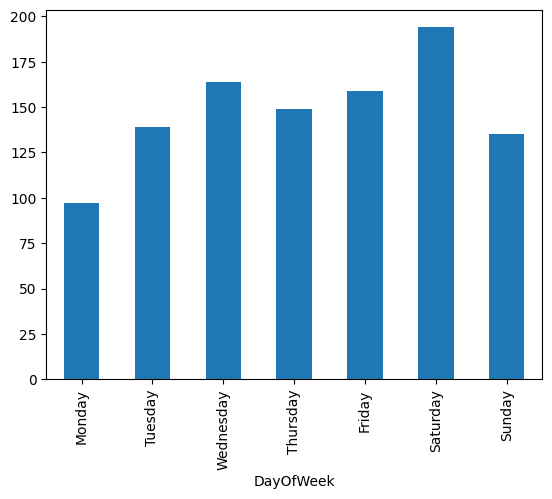

In [15]:
# District
da3 = accidents[accidents['District Area'] == 'Gloucester']

monthly = da3.groupby(['Year', 'Month']).size()

monthly = monthly.unstack(level=0)

monthly.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Gloucester by Year'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

# Per Year, Month, Day
accidents_per_year = da3['Year'].value_counts().sort_index()
accidents_per_month = da3['Month'].value_counts().sort_index()
accidents_per_day = da3['DayOfWeek'].value_counts().sort_index()

accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

accidents_per_month.index = accidents_per_month.index.map(month_names)

accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

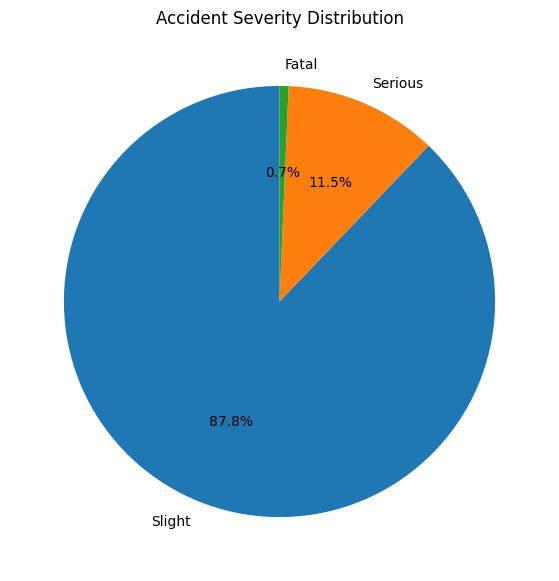

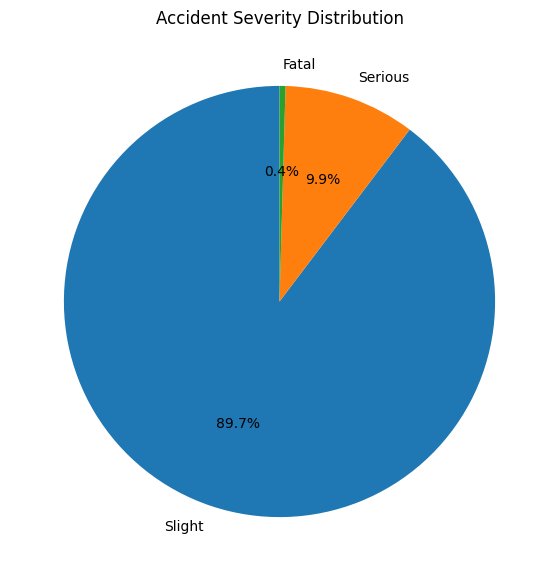

In [16]:
# Severity
severity  = da3['Accident_Severity'].value_counts()

plt.pie(severity,
        labels = severity.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2022_da3 = da3[da3['Year'] == 2022]

da3_2022 = severity_2022_da3['Accident_Severity'].value_counts()

plt.pie(da3_2022,
        labels = da3_2022.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

<h1>HEATMAP FOR GLOUCESTER DISTRICT</h1>

In [17]:
gAccidents = accidents[accidents['District Area']== 'Gloucester']

gFatal = gAccidents[gAccidents['Accident_Severity'] == 'Fatal']

locations  = list(zip(gFatal['Latitude'],gFatal['Longitude']))

MAR = folium.Map(location=[gFatal['Latitude'].mean(), gFatal['Longitude'].mean()], zoom_start=10)

HeatMap(locations).add_to(MAR)
MAR.save('accident_heatmap.html')
MAR

<hr>
<h1>INSIGHT #4</h1>
<p>Most accidents in Gloucester district are classified as <b>slight</b>, with only a small share being serious or fatal.
The heatmap shows accident hotspots around Coney Hill, Barnwood, Hardwicke, and central Gloucester, suggesting these areas need targeted safety measures.</p>

<h1>INSIGHT #5</h1>
<p>Accidents occur throughout the year but tend to peak in May, June, and August, likely due to higher travel activity during these months.</p>

<hr>
<h1>DISTRICT #4 - EREWASH</h1>

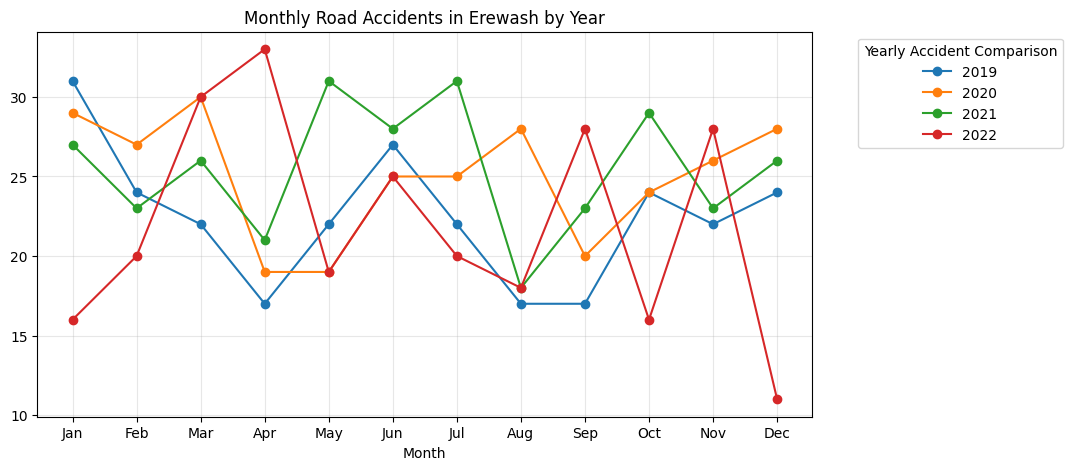

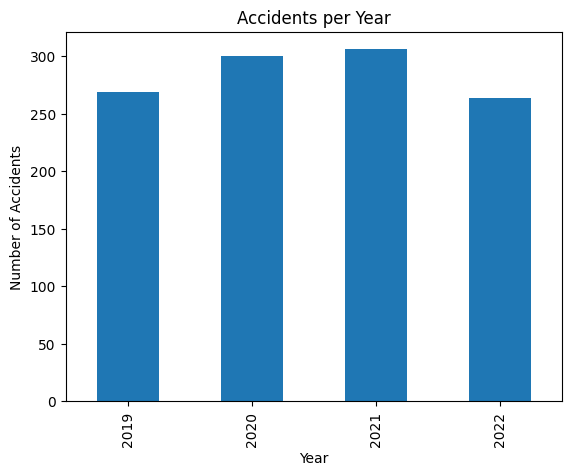

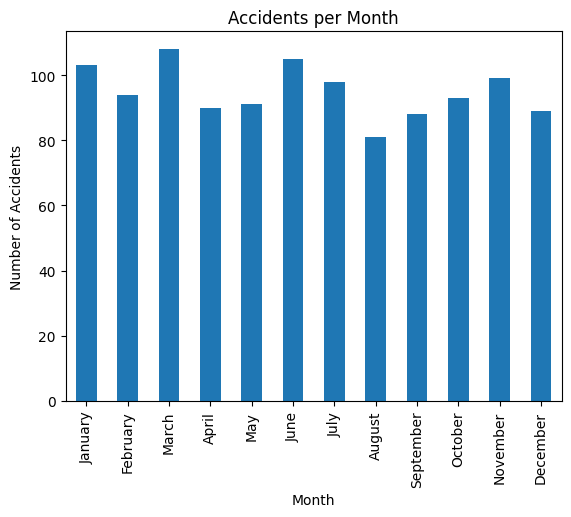

DayOfWeek
Monday       119
Tuesday      138
Wednesday    162
Thursday     184
Friday       166
Saturday     204
Sunday       166
Name: count, dtype: int64


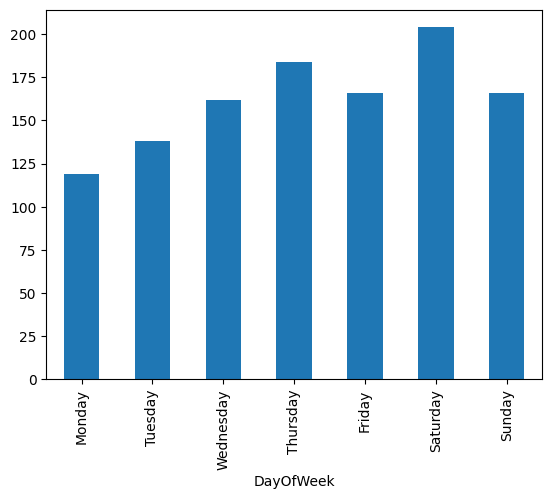

In [18]:
# District
da4 = accidents[accidents['District Area'] == 'Erewash']

monthly = da4.groupby(['Year', 'Month']).size()

monthly = monthly.unstack(level=0)

monthly.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Erewash by Year'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

# Per Year, Month, Day
accidents_per_year = da4['Year'].value_counts().sort_index()
accidents_per_month = da4['Month'].value_counts().sort_index()
accidents_per_day = da4['DayOfWeek'].value_counts().sort_index()

accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

accidents_per_month.index = accidents_per_month.index.map(month_names)

accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

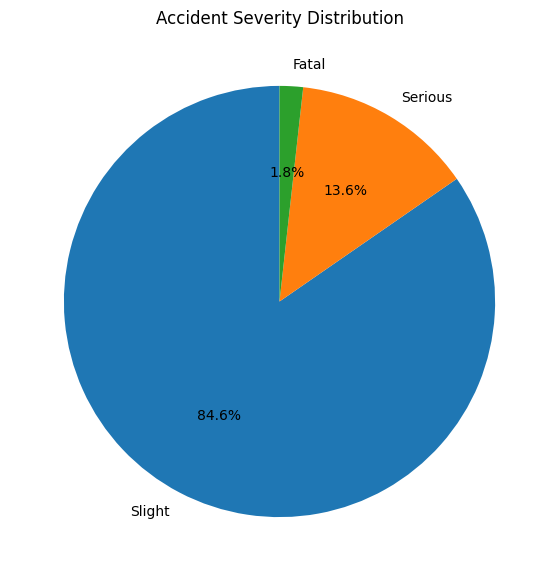

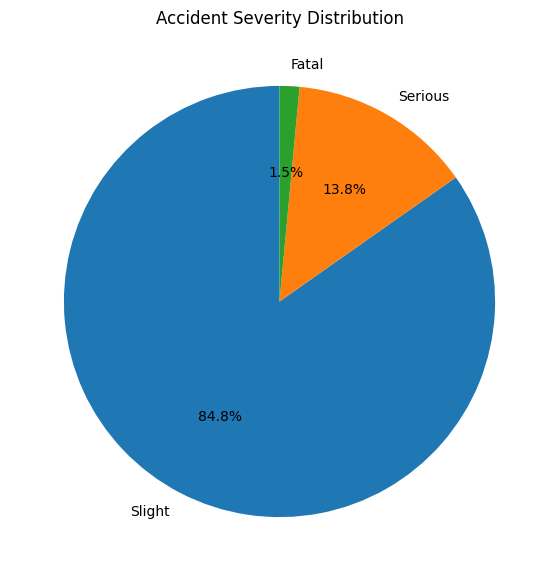

In [19]:
# Severity
severity  = da4['Accident_Severity'].value_counts()

plt.pie(severity,
        labels = severity.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2019_da4 = da4[da4['Year'] == 2019]

da4_2019 = severity_2019_da4['Accident_Severity'].value_counts()

plt.pie(da4_2019,
        labels = da4_2019.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

<h1>HEATMAP FOR EREWASH DISTRICT</h1>

In [20]:
eAccidents = accidents[accidents['District Area']== 'Erewash']

eFatal = eAccidents[eAccidents['Accident_Severity'] == 'Fatal']

locations  = list(zip(eFatal['Latitude'],eFatal['Longitude']))

MAR = folium.Map(location=[eFatal['Latitude'].mean(), eFatal['Longitude'].mean()], zoom_start=10)

HeatMap(locations).add_to(MAR)
MAR.save('accident_heatmap.html')
MAR

<hr>
<h1>INSIGHT #6</h1>
<p>In Erewash district, most accidents are classified as <b>slight</b>, with only a small percentage being serious or fatal, showing that while collisions are frequent, severe cases are relatively rare.</p>

<h1>INSIGHT #7</h1>
<p>The heatmap highlights accident clusters along the A52 near Borrowash, Spondon, and the Sandiacre Interchange, indicating these are high-risk areas with heavy traffic flow.</p>

<h1>INSIGHT #8</h1>
<p>Accidents are <b>fairly steady</b> across months, though slight increases appear in spring and summer, suggesting seasonal travel may contribute to higher incident levels.</p>

<hr>
<h1>DISTRICT #5 - LEWES</h1>

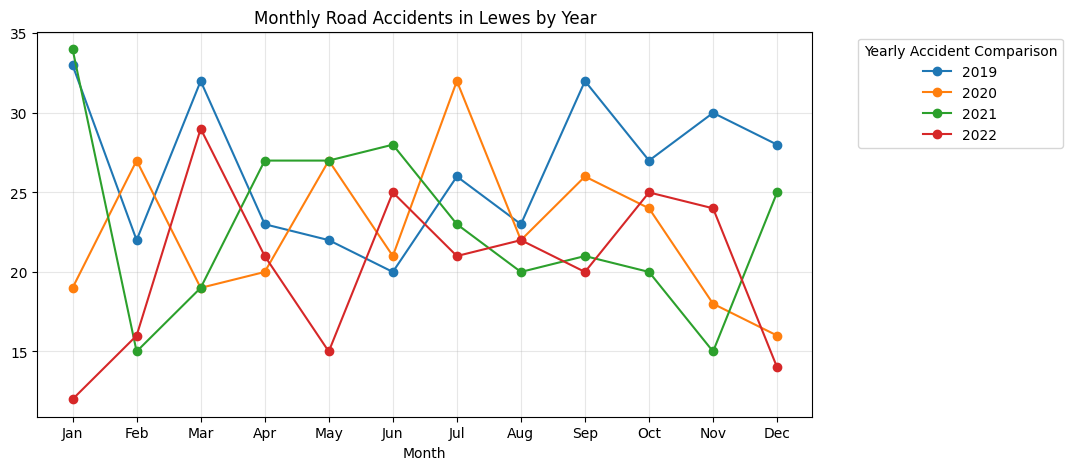

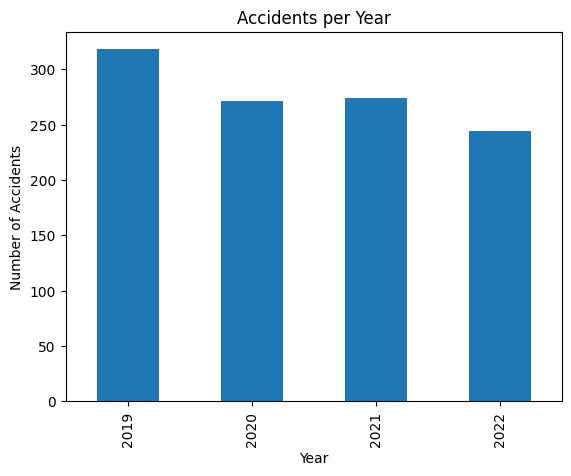

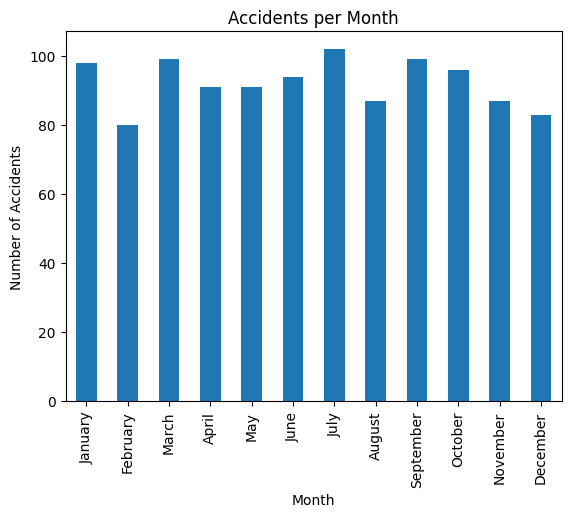

DayOfWeek
Monday       106
Tuesday      151
Wednesday    168
Thursday     187
Friday       172
Saturday     164
Sunday       159
Name: count, dtype: int64


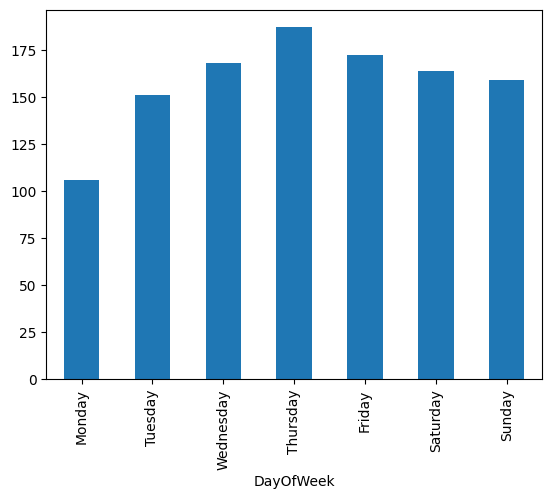

In [21]:
# District
da5 = accidents[accidents['District Area'] == 'Lewes']

monthly = da5.groupby(['Year', 'Month']).size()

monthly = monthly.unstack(level=0)

monthly.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Lewes by Year'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

# Per Year, Month, Day
accidents_per_year = da5['Year'].value_counts().sort_index()
accidents_per_month = da5['Month'].value_counts().sort_index()
accidents_per_day = da5['DayOfWeek'].value_counts().sort_index()

accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

accidents_per_month.index = accidents_per_month.index.map(month_names)

accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

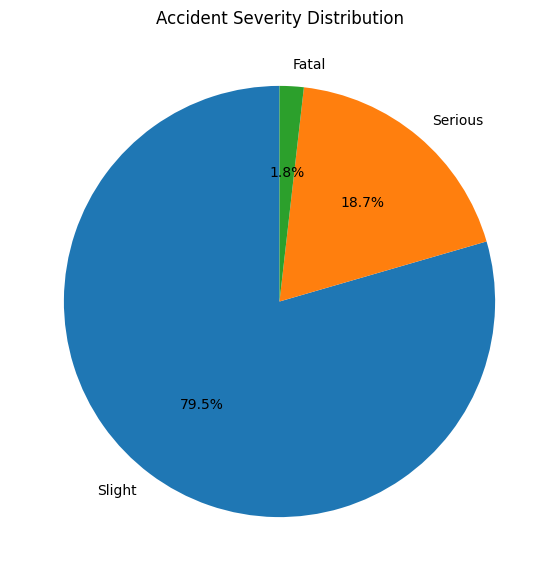

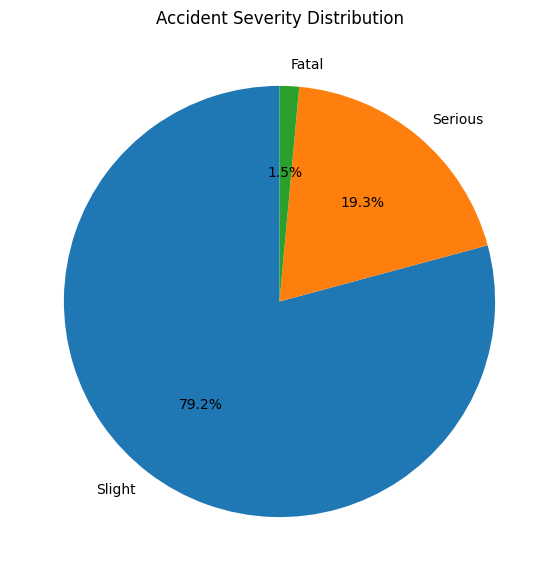

In [22]:
# Severity
severity  = da5['Accident_Severity'].value_counts()

plt.pie(severity,
        labels = severity.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2021_da5 = da5[da5['Year'] == 2021]

da5_2021 = severity_2021_da5['Accident_Severity'].value_counts()

plt.pie(da5_2021,
        labels = da5_2021.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

<h1>HEATMAP FOR LEWES DISTRICT</h1>

In [23]:
lAccidents = accidents[accidents['District Area']== 'Lewes']

lFatal = lAccidents[lAccidents['Accident_Severity'] == 'Fatal']

locations  = list(zip(lFatal['Latitude'],lFatal['Longitude']))

MAR = folium.Map(location=[lFatal['Latitude'].mean(), lFatal['Longitude'].mean()], zoom_start=10)

HeatMap(locations).add_to(MAR)
MAR.save('accident_heatmap.html')
MAR

<hr>
<h1>INSIGHT #9</h1>
<p>In Lewes district, most accidents are recorded as <b>slight</b>, but there is still a notable share of serious cases, making up nearly one-fifth of total incidents.</p>

<h1>INSIGHT #10</h1>
<p>The heatmap shows a strong concentration of accidents near Newhaven, with additional clusters around Lewes and the routes connecting toward Brighton, indicating these as key danger zones.</p>

<h1>INSIGHT #11</h1>
<p>Monthly accident levels are fairly steady, though the summer months tend to have slightly higher numbers, suggesting seasonal travel may influence collision rates.</p>

<hr>
<h1>DISTRICT #6 - ANGUS</h1>

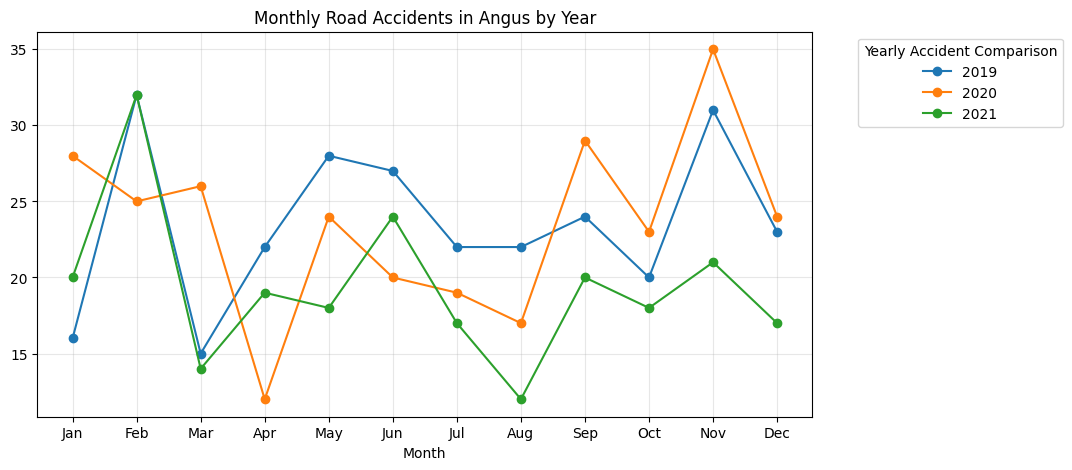

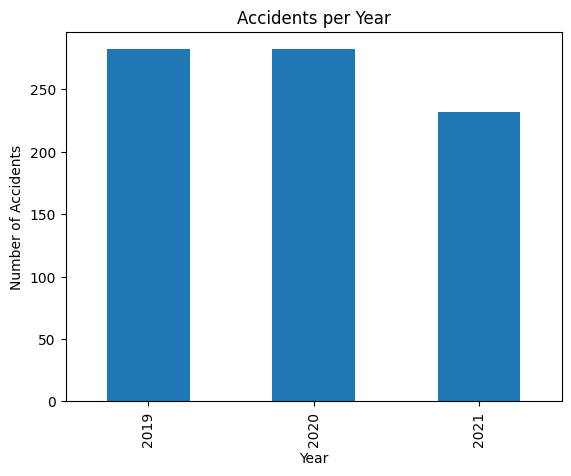

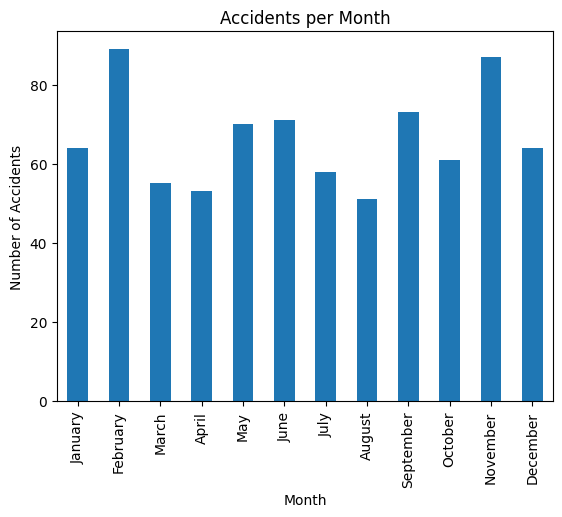

DayOfWeek
Monday        92
Tuesday      109
Wednesday    103
Thursday     134
Friday       117
Saturday     141
Sunday       100
Name: count, dtype: int64


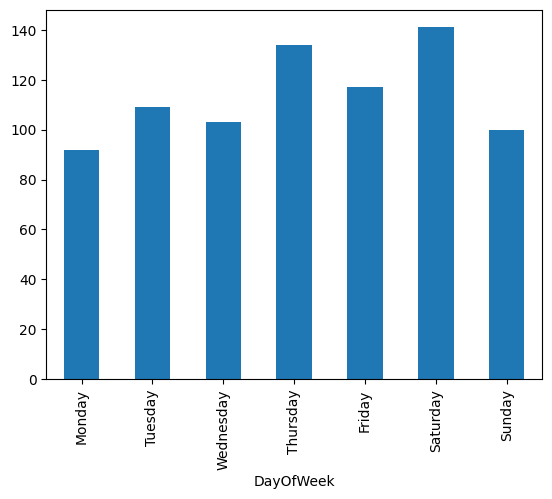

In [24]:
# District
da6 = accidents[accidents['District Area'] == 'Angus']

monthly = da6.groupby(['Year', 'Month']).size()

monthly = monthly.unstack(level=0)

monthly.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Angus by Year'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

# Per Year, Month, Day
accidents_per_year = da6['Year'].value_counts().sort_index()
accidents_per_month = da6['Month'].value_counts().sort_index()
accidents_per_day = da6['DayOfWeek'].value_counts().sort_index()

accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

accidents_per_month.index = accidents_per_month.index.map(month_names)

accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

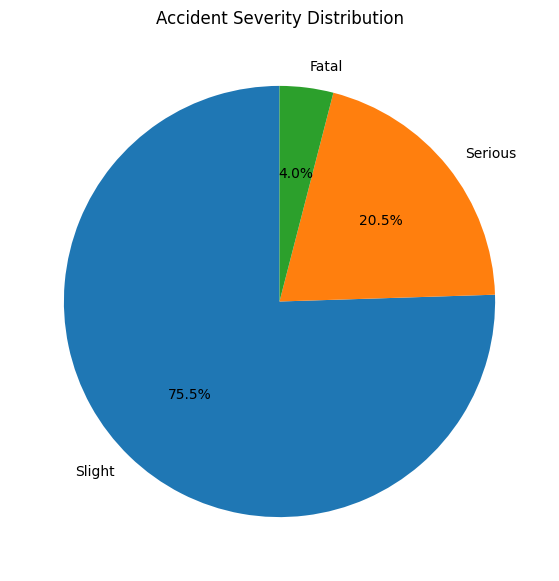

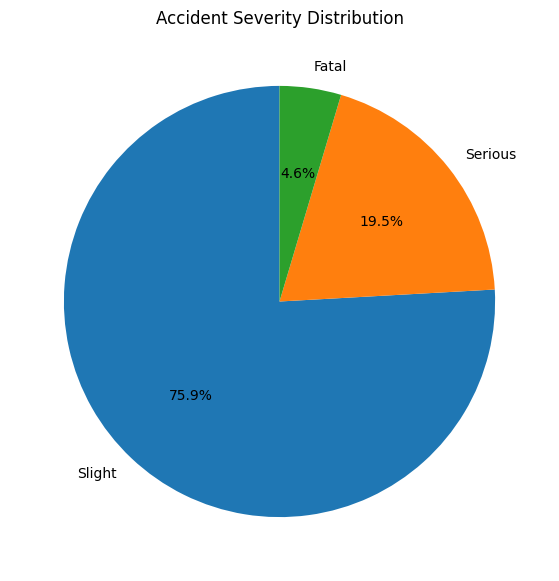

In [25]:
# Severity
severity  = da6['Accident_Severity'].value_counts()

plt.pie(severity,
        labels = severity.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2019_da6 = da6[da6['Year'] == 2019]

da6_2019 = severity_2019_da6['Accident_Severity'].value_counts()

plt.pie(da6_2019,
        labels = da6_2019.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

<h1>HEATMAP FOR ANGUS DISTRICT</h1>

In [26]:
aAccidents = accidents[accidents['District Area']== 'Angus']

aFatal = aAccidents[aAccidents['Accident_Severity'] == 'Fatal']

locations  = list(zip(aFatal['Latitude'],aFatal['Longitude']))

MAR = folium.Map(location=[aFatal['Latitude'].mean(), aFatal['Longitude'].mean()], zoom_start=10)

HeatMap(locations).add_to(MAR)
MAR.save('accident_heatmap.html')
MAR

<hr>
<h1>INSIGHT #12</h1>
<p>Road accidents in Angus peaked during late autumn and early winter, with November consistently recording one of the highest accident counts across years, while August saw notably fewer incidents.</p>

<h1>INSIGHT #13</h1>
<p>Weekly accident distribution shows that weekends, particularly Saturdays, experience the highest number of accidents, suggesting increased travel or riskier driving behaviors.</p>

<h1>INSIGHT #14</h1>
<p>Most accidents were classified as <b>slight</b>, while serious and fatal accidents made up about a quarter combined, highlighting that while accidents are frequent, severe outcomes are less common.</p>

In [27]:
accidents['District Area'].unique()

array(['Kensington and Chelsea', 'Westminster', 'Richmond upon Thames',
       'Hammersmith and Fulham', 'Hounslow', 'Tower Hamlets',
       'City of London', 'Southwark', 'Camden', 'Hackney', 'Islington',
       'Barnet', 'Brent', 'Haringey', 'Merton', 'Ealing', 'Enfield',
       'Greenwich', 'Newham', 'London Airport (Heathrow)', 'Hillingdon',
       'Waltham Forest', 'Redbridge', 'Barking and Dagenham', 'Bromley',
       'Havering', 'Croydon', 'Lambeth', 'Wandsworth', 'Sutton', 'Bexley',
       'Lewisham', 'Harrow', 'Kingston upon Thames', 'Barrow-in-Furness',
       'South Lakeland', 'Carlisle', 'Eden', 'Allerdale', 'Copeland',
       'Fylde', 'Blackpool', 'Wyre', 'Lancaster', 'Chorley',
       'West Lancashire', 'South Ribble', 'Preston',
       'Blackburn with Darwen', 'Hyndburn', 'Ribble Valley', 'Burnley',
       'Pendle', 'Rossendale', 'Wirral', 'Liverpool', 'Sefton',
       'Knowsley', 'St. Helens', 'Manchester', 'Salford', 'Tameside',
       'Stockport', 'Bolton', 'Wigan', '

<hr>
<h1>INSIGHT #15</h1>
<p>Across all districts, a consistent similarity is that the majority of road accidents are classified as <b>slight</b>, with serious and fatal accidents forming only a smaller proportion. However, there are differences in <b>time patterns</b>: Angus and Lewes see peaks in the summer and late autumn months, while Erewash has relatively steady accident levels across the year, and Gloucester shows clear seasonal peaks in May, June, and August. In terms of <b>locations</b>, each district’s heatmap highlights different hotspots, urban centers like Mansfield and Northampton, major road junctions in Erewash, or coastal and connecting routes in Lewes, indicating that geography and traffic flow strongly influence where accidents cluster.
</p>